# Plotting and Visualization

In [1]:
import numpy as np
import pandas as pd
PREVIOUS_MAX_ROWS = pd.options.display.max_rows
pd.options.display.max_rows = 20
np.random.seed(12345)
import matplotlib.pyplot as plt
import matplotlib
plt.rc('figure', figsize=(10, 6))
np.set_printoptions(precision=4, suppress=True)

```python
%matplotlib notebook
```

## A Brief matplotlib API Primer

In [2]:
import matplotlib.pyplot as plt

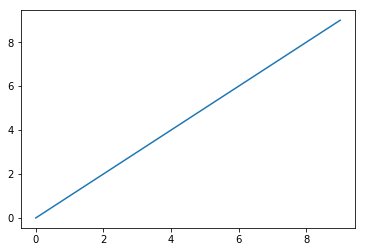

In [2]:
import numpy as np
data = np.arange(10)
data
plt.plot(data)

### Figures and Subplots

### <mark>figure是一个对象</mark>

In [3]:
fig = plt.figure()

<Figure size 432x288 with 0 Axes>

In [4]:
ax1 = fig.add_subplot(2, 2, 1)

In [5]:
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)

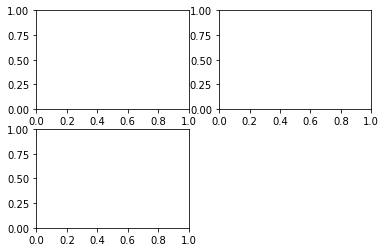

In [17]:
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)

> 提示：使用Jupyter notebook有一点不同，即每个小窗重新执行后，图形会被重置。因此，对于复杂的图形，，你必须将所有的绘图命令存在一个小窗里。

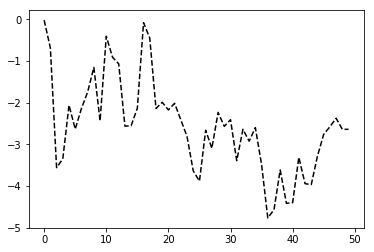

In [18]:
plt.plot(np.random.randn(50).cumsum(), 'k--')

In [20]:
_ = ax1.hist(np.random.randn(100), bins=20, color='k', alpha=0.3)

In [21]:
ax2.scatter(np.arange(30), np.arange(30) + 3 * np.random.randn(30))

### <mark>画图要在一个小窗里执行</mark>

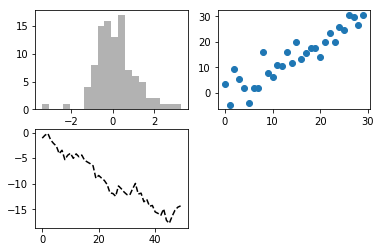

In [23]:
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
plt.plot(np.random.randn(50).cumsum(), 'k--')
_ = ax1.hist(np.random.randn(100), bins=20, color='k', alpha=0.3)
ax2.scatter(np.arange(30), np.arange(30) + 3 * np.random.randn(30))

In [24]:
plt.close('all')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020CE0296CC0>,
      dtype=object)

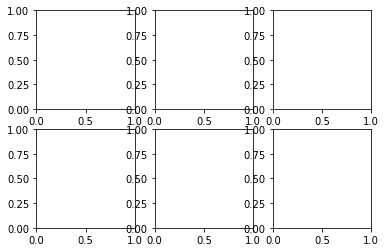

In [26]:
fig, axes = plt.subplots(2, 3)
axes

> 这是非常实用的，因为可以轻松地对axes数组进行索引，就好像是一个二维数组一样，例如axes[0,1]。你还可以通过sharex和sharey指定subplot应该具有相同的X轴或Y轴。在比较相同范围的数据时，这也是非常实用的，否则，matplotlib会自动缩放各图表的界限。

![pyplot.subplots的选项](http://upload-images.jianshu.io/upload_images/7178691-88bb55faca7d01ba.png?imageMogr2/auto-orient/strip|imageView2/2/w/1240)

#### Adjusting the spacing around subplots

```python
subplots_adjust(left=None, bottom=None, right=None, top=None,
                wspace=None, hspace=None)
```

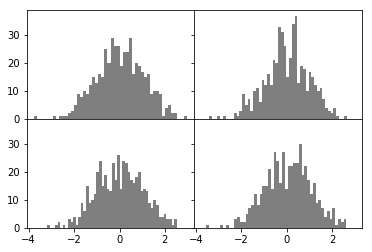

In [27]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        axes[i, j].hist(np.random.randn(500), bins=50, color='k', alpha=0.5)
plt.subplots_adjust(wspace=0, hspace=0)

### Colors, Markers, and Line Styles

```python
ax.plot(x, y, 'g--')
```

```python
ax.plot(x, y, linestyle='--', color='g')
```

In [28]:
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

> 线图可以使用标记强调数据点。因为matplotlib可以创建连续线图，在点之间进行插值，因此有时可能不太容易看出真实数据点的位置。标记也可以放到格式字符串中，但标记类型和线型必须放在颜色后面

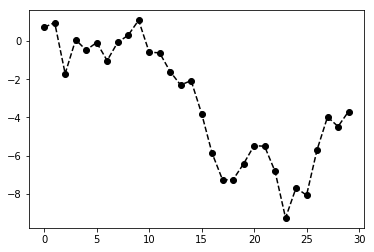

In [31]:
from numpy.random import randn
plt.plot(randn(30).cumsum(), 'ko--')

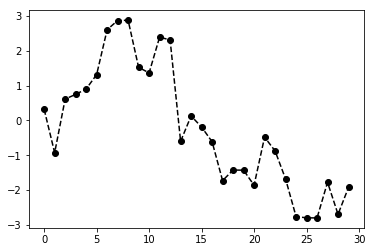

In [32]:
plt.plot(randn(30).cumsum(), color='k', linestyle='dashed', marker='o')

In [33]:
plt.close('all')

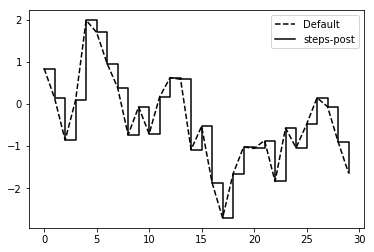

In [34]:
data = np.random.randn(30).cumsum()
plt.plot(data, 'k--', label='Default')
plt.plot(data, 'k-', drawstyle='steps-post', label='steps-post')
plt.legend(loc='best')

### Ticks, Labels, and Legends

#### Setting the title, axis labels, ticks, and ticklabels

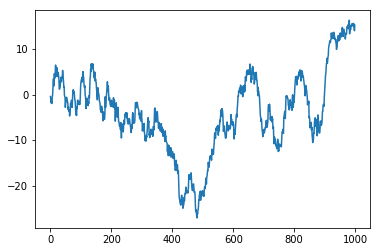

In [35]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(np.random.randn(1000).cumsum())

Text(0.5, 0, 'Stages')

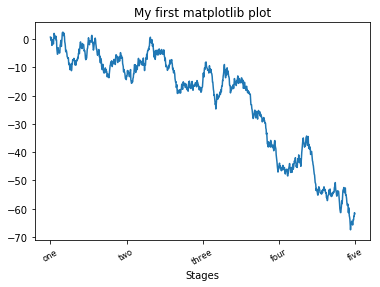

In [42]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(np.random.randn(1000).cumsum())
ticks = ax.set_xticks([0, 250, 500, 750, 1000]) #要将刻度放在数据范围中的哪些位置
labels = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'],
                           rotation=30, fontsize='small')
#也可以用其他值做标签
#rotation 旋转角度
ax.set_title('My first matplotlib plot')
ax.set_xlabel('Stages')

>轴的类有集合方法，可以批量设定绘图选项:
```python
props = {
    'title': 'My first matplotlib plot',
    'xlabel': 'Stages'
}
ax.set(**props)```

#### Adding legends

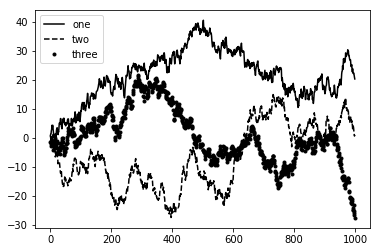

In [43]:
from numpy.random import randn
fig = plt.figure(); ax = fig.add_subplot(1, 1, 1)
ax.plot(randn(1000).cumsum(), 'k', label='one')
ax.plot(randn(1000).cumsum(), 'k--', label='two')
ax.plot(randn(1000).cumsum(), 'k.', label='three')
ax.legend(loc='best')

In [46]:
#plt.plot?

### Annotations and Drawing on a Subplot

ax.text(x, y, 'Hello world!',
        family='monospace', fontsize=10)

Text(0.5, 1.0, 'Important dates in the 2008-2009 financial crisis')

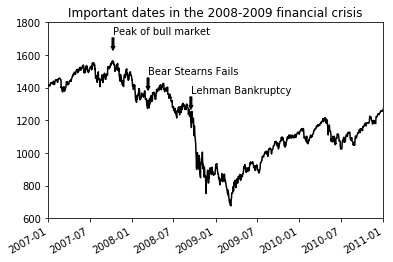

In [47]:
from datetime import datetime

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

data = pd.read_csv('examples/spx.csv', index_col=0, parse_dates=True)
spx = data['SPX']

spx.plot(ax=ax, style='k-')

crisis_data = [
    (datetime(2007, 10, 11), 'Peak of bull market'),
    (datetime(2008, 3, 12), 'Bear Stearns Fails'),
    (datetime(2008, 9, 15), 'Lehman Bankruptcy')
]

for date, label in crisis_data:
    ax.annotate(label, xy=(date, spx.asof(date) + 75),
                xytext=(date, spx.asof(date) + 225),
                arrowprops=dict(facecolor='black', headwidth=4, width=2,
                                headlength=4),
                horizontalalignment='left', verticalalignment='top')

# Zoom in on 2007-2010
ax.set_xlim(['1/1/2007', '1/1/2011'])
ax.set_ylim([600, 1800])

ax.set_title('Important dates in the 2008-2009 financial crisis')

> 图形的绘制要麻烦一些。matplotlib有一些表示常见图形的对象。这些对象被称为块（patch）。其中有些（如Rectangle和Circle），可以在matplotlib.pyplot中找到，但完整集合位于matplotlib.patches。

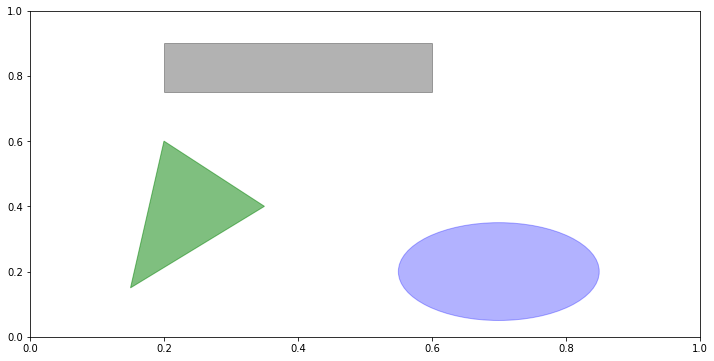

In [23]:
fig = plt.figure(figsize=(12, 6)); ax = fig.add_subplot(1, 1, 1)
rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color='k', alpha=0.3)
circ = plt.Circle((0.7, 0.2), 0.15, color='b', alpha=0.3)
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]],
                   color='g', alpha=0.5)
ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)

### Saving Plots to File

plt.savefig('figpath.svg')

plt.savefig('figpath.png', dpi=400, bbox_inches='tight')
bbox_inches（可以剪除当前图表周围的空白部分）

> savefig并非一定要写入磁盘，也可以写入任何文件型的对象，比如BytesIO：
```python
from io import BytesIO
buffer = BytesIO()
plt.savefig(buffer)
plot_data = buffer.getvalue()
```

![Figure.savefig的选项](http://upload-images.jianshu.io/upload_images/7178691-4bee796bf7262423.png?imageMogr2/auto-orient/strip|imageView2/2/w/1240)

### matplotlib Configuration

```python
plt.rc('figure', figsize=(10, 10))
```

> rc的第一个参数是希望自定义的对象，如'figure'、'axes'、'xtick'、'ytick'、'grid'、'legend'等。其后可以跟上一系列的关键字参数。一个简单的办法是将这些选项写成一个字典：

```python
font_options = {'family' : 'monospace',
                'weight' : 'bold',
                'size'   : 'small'}
plt.rc('font', **font_options)
```

## Plotting with pandas and seaborn

> 提示：引入seaborn会修改matplotlib默认的颜色方案和绘图类型，以提高可读性和美观度。即使你不使用seaborn API，你可能也会引入seaborn，作为提高美观度和绘制常见matplotlib图形的简化方法。

### Line Plots

In [2]:
plt.close('all')

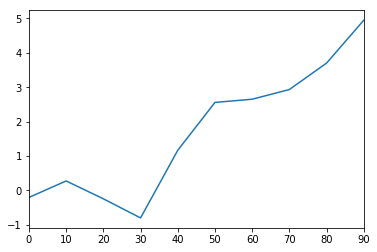

In [3]:
s = pd.Series(np.random.randn(10).cumsum(), index=np.arange(0, 100, 10))
s.plot()

![Series.plot方法的参数](http://upload-images.jianshu.io/upload_images/7178691-6d9fbf863c09370a.png?imageMogr2/auto-orient/strip|imageView2/2/w/1240)
![Series.plot方法的参数](http://upload-images.jianshu.io/upload_images/7178691-44e50562aeb5eb49.png?imageMogr2/auto-orient/strip|imageView2/2/w/1240)

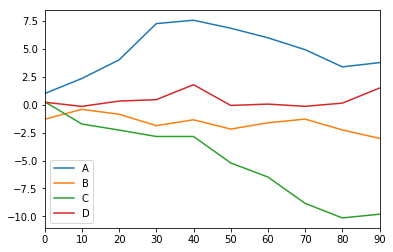

In [4]:
df = pd.DataFrame(np.random.randn(10, 4).cumsum(0),
                  columns=['A', 'B', 'C', 'D'],
                  index=np.arange(0, 100, 10))
df.plot()

![专用于DataFrame的plot参数](http://upload-images.jianshu.io/upload_images/7178691-96651ecaa90f1c68.png?imageMogr2/auto-orient/strip|imageView2/2/w/1240)

### Bar Plots

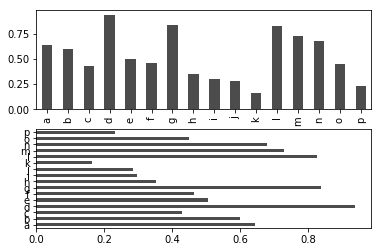

In [15]:
fig, axes = plt.subplots(2, 1)
data = pd.Series(np.random.rand(16), index=list('abcdefghijklmnop'))
data.plot.bar(ax=axes[0], color='k', alpha=0.7)
data.plot.barh(ax=axes[1], color='k', alpha=0.7) #bar horiantal
#alpha 透明度

In [16]:
np.random.seed(12348)

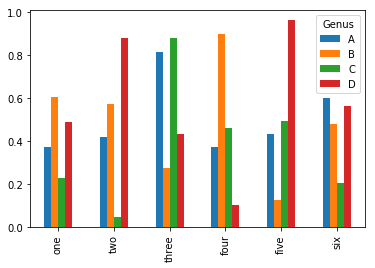

In [17]:
df = pd.DataFrame(np.random.rand(6, 4),
                  index=['one', 'two', 'three', 'four', 'five', 'six'],
                  columns=pd.Index(['A', 'B', 'C', 'D'], name='Genus'))
df.plot.bar()

In [19]:
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

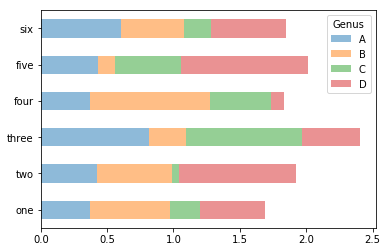

In [21]:
df.plot.barh(stacked=True, alpha=0.5)
#stacked=True即可为DataFrame生成堆积柱状图

> 笔记：柱状图有一个非常不错的用法：利用value_counts图形化显示Series中各值的出现频率，比如s.value_counts().plot.bar()。

In [23]:
plt.close('all')

In [24]:
tips = pd.read_csv('examples/tips.csv')
tips

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4
5,25.29,4.71,No,Sun,Dinner,4
6,8.77,2.00,No,Sun,Dinner,2
7,26.88,3.12,No,Sun,Dinner,4
8,15.04,1.96,No,Sun,Dinner,2
9,14.78,3.23,No,Sun,Dinner,2


### <mark>pd.crosstab数据透视again</mark>

In [25]:
party_counts = pd.crosstab(tips['day'], tips['size'])
party_counts

size,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


In [26]:
# Not many 1- and 6-person parties
party_counts = party_counts.loc[:, 2:5]

In [27]:
# Normalize to sum to 1
party_pcts = party_counts.div(party_counts.sum(1), axis=0)
party_pcts

size,2,3,4,5
day,,,,
Fri,0.888889,0.055556,0.055556,0.000000
Sat,0.623529,0.211765,0.152941,0.011765
Sun,0.520000,0.200000,0.240000,0.040000
Thur,0.827586,0.068966,0.086207,0.017241


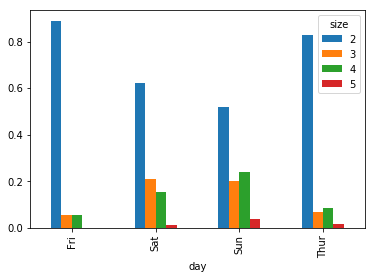

In [28]:
party_pcts.plot.bar()

In [29]:
plt.close('all')

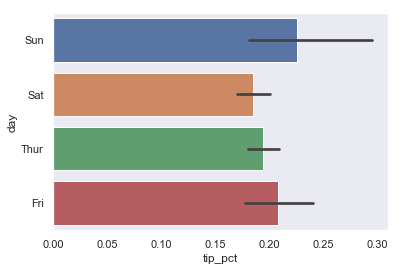

In [52]:
import seaborn as sns
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips.head()
sns.barplot(x='tip_pct', y='day', data=tips, orient='h')

In [49]:
plt.close('all')

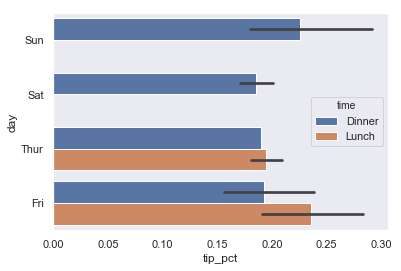

In [53]:
sns.barplot(x='tip_pct', y='day', hue='time', data=tips, orient='h')

In [40]:
plt.close('all')

In [57]:
sns.set(style="whitegrid")

In [45]:
#sns.set?

### Histograms and Density Plots

In [41]:
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

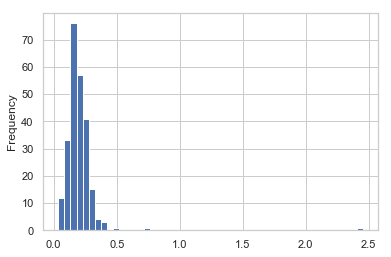

In [58]:
tips['tip_pct'].plot.hist(bins=50)

In [59]:
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

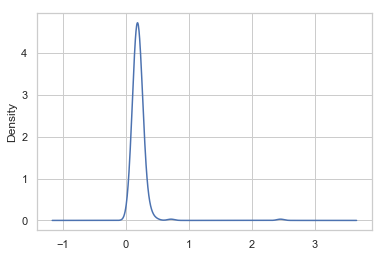

In [60]:
tips['tip_pct'].plot.density()

In [61]:
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

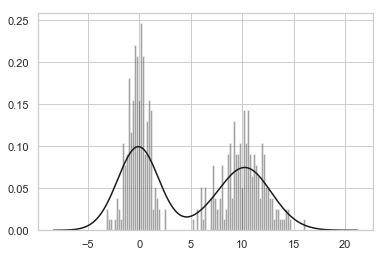

In [62]:
comp1 = np.random.normal(0, 1, size=200)
comp2 = np.random.normal(10, 2, size=200)
values = pd.Series(np.concatenate([comp1, comp2]))
sns.distplot(values, bins=100, color='k')

### Scatter or Point Plots

In [64]:
macro = pd.read_csv('examples/macrodata.csv')
data = macro[['cpi', 'm1', 'tbilrate', 'unemp']]
trans_data = np.log(data).diff().dropna()
trans_data[-5:]

,cpi,m1,tbilrate,unemp
198,-0.007904,0.045361,-0.396881,0.105361
199,-0.021979,0.066753,-2.277267,0.139762
200,0.002340,0.010286,0.606136,0.160343
201,0.008419,0.037461,-0.200671,0.127339
202,0.008894,0.012202,-0.405465,0.042560


In [65]:
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Changes in log m1 versus log unemp')

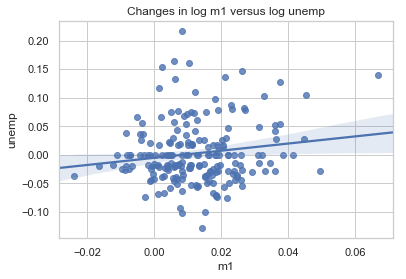

In [66]:
sns.regplot('m1', 'unemp', data=trans_data)
plt.title('Changes in log %s versus log %s' % ('m1', 'unemp'))

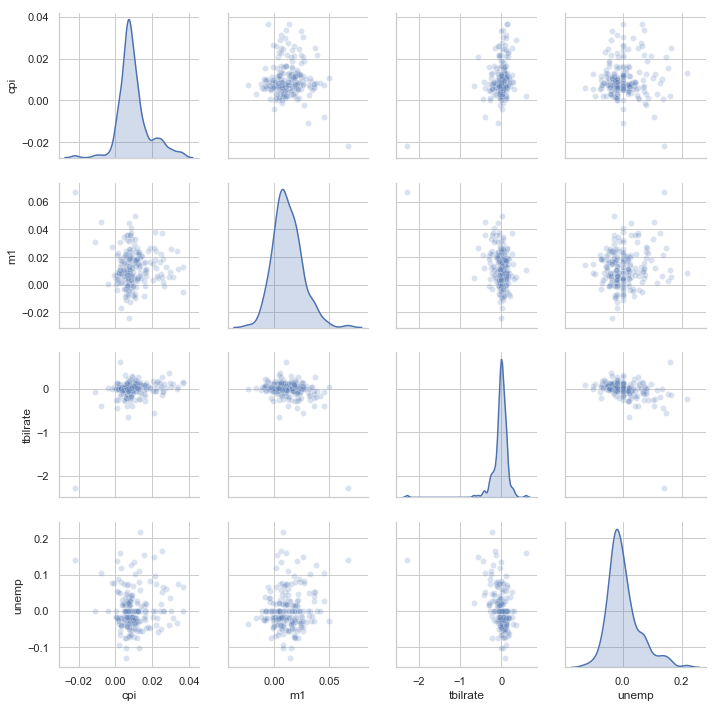

In [67]:
sns.pairplot(trans_data, diag_kind='kde', plot_kws={'alpha': 0.2})

### Facet Grids and Categorical Data

### <mark>factorplot可以简化制作多种分面图</mark>

C:\Users\csu05\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


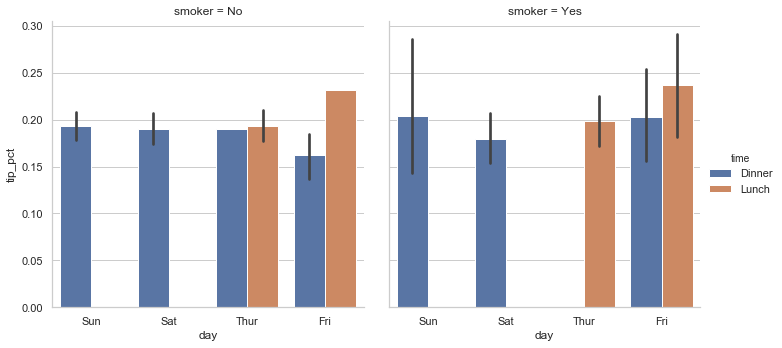

In [68]:
sns.factorplot(x='day', y='tip_pct', hue='time', col='smoker',
               kind='bar', data=tips[tips.tip_pct < 1])

C:\Users\csu05\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


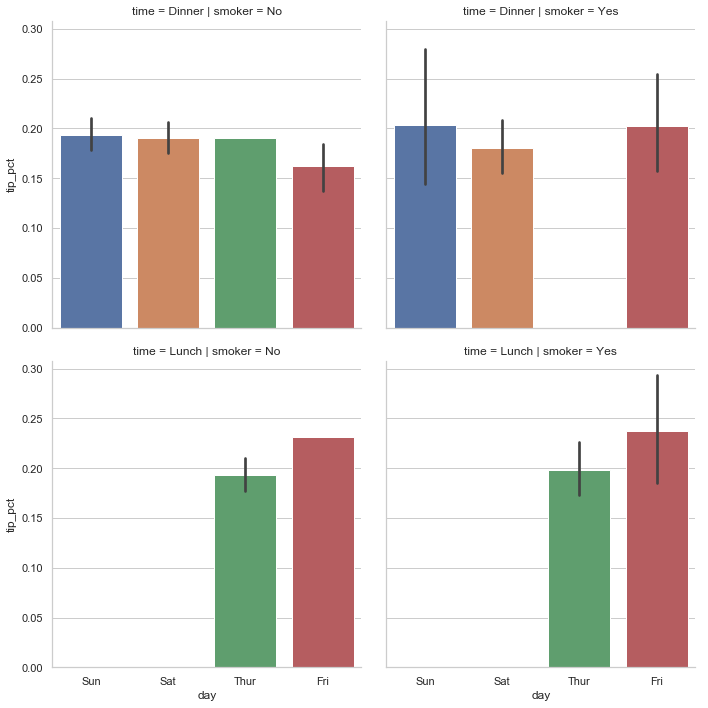

In [69]:
sns.factorplot(x='day', y='tip_pct', row='time',
               col='smoker',
               kind='bar', data=tips[tips.tip_pct < 1])

C:\Users\csu05\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


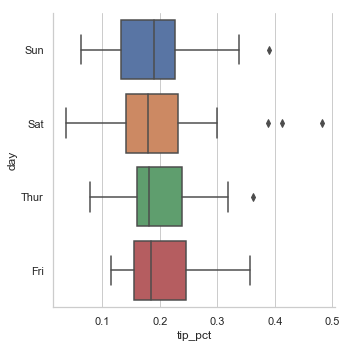

In [70]:
sns.factorplot(x='tip_pct', y='day', kind='box',
               data=tips[tips.tip_pct < 0.5])

## Other Python Visualization Tools

In [71]:
pd.options.display.max_rows = PREVIOUS_MAX_ROWS

## Conclusion